TPR [0.         0.98987342 1.        ]
FPR [0.         0.01647059 1.        ]
AUC 0.9867014147431123
Count 0.1


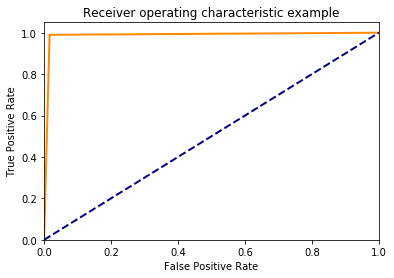

TPR [0.         0.99007444 1.        ]
FPR [0.         0.00959233 1.        ]
AUC 0.990241057774128
Count 0.2


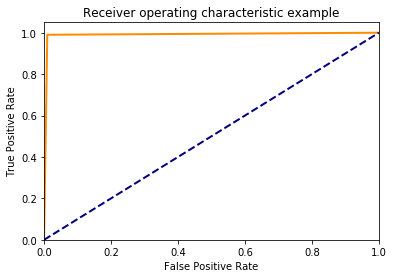

TPR [0.         0.99244332 1.        ]
FPR [0.        0.0070922 1.       ]
AUC 0.9926755631777336
Count 0.3


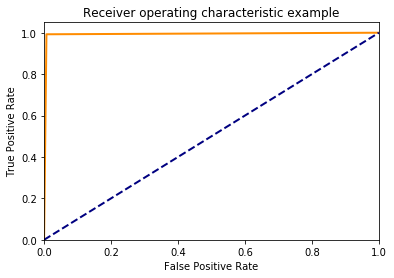

TPR [0.         0.98792271 1.        ]
FPR [0.         0.00738916 1.        ]
AUC 0.9902667713762165
Count 0.4


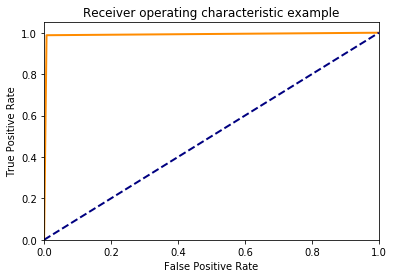

TPR [0.         0.97542998 1.        ]
FPR [0.         0.00968523 1.        ]
AUC 0.9828723727028812
Count 0.5


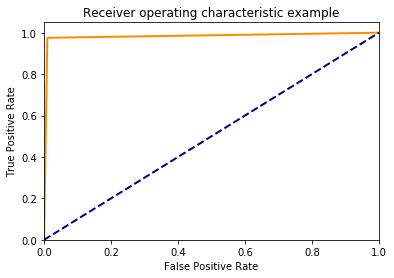

TPR [0.         0.98533007 1.        ]
FPR [0.         0.00973236 1.        ]
AUC 0.9877988566261549
Count 0.6


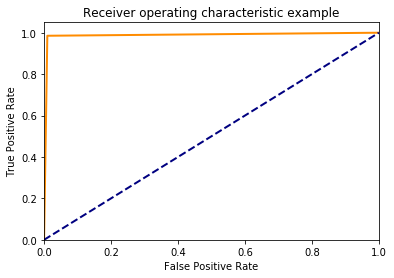

TPR [0.         0.99007444 1.        ]
FPR [0.         0.01438849 1.        ]
AUC 0.9878429762393558
Count 0.7


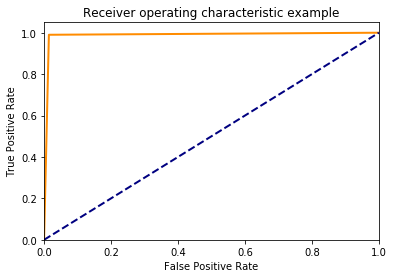

TPR [0.         0.99069767 1.        ]
FPR [0.         0.01025641 1.        ]
AUC 0.9902206320810972
Count 0.8


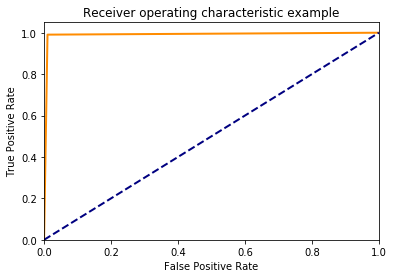

TPR [0. 1. 1.]
FPR [0.         0.00724638 1.        ]
AUC 0.9963768115942029
Count 0.9


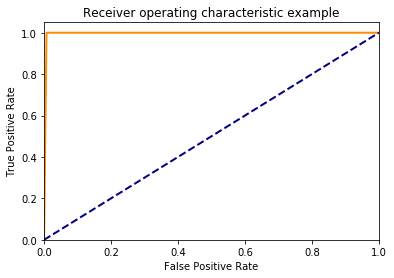

TPR [0.         0.98997494 1.        ]
FPR [0.         0.00475059 1.        ]
AUC 0.9926121717595652
Count 1


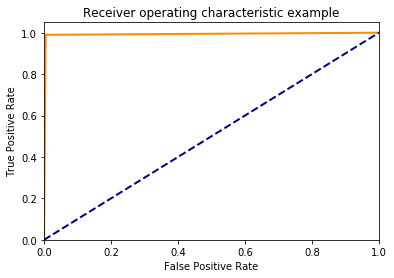

In [6]:
import pandas as pd
import numpy as np
from math import exp
from scipy.special import expit
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


X = pd.read_csv("MNIST_CV.csv")
kf = KFold(n_splits=10)
kf.get_n_splits(X)

#transforming training to matrix 
X = X.as_matrix()

#Xtest = Xtest.as_matrix()
X = np.where(X != 8, X, 1)
X = np.where(X != 6, X, 0)
        
# Estimate logistic regression coefficients using stochastic gradient descent
def coefficients(train,y_train,initialCoef, l_rate, iterations):
    
    coef = initialCoef
    
    
    partialInit = [0.0 for i in range(len(train[0]))]
    
    for i in range(iterations): 
        
        #multiply this row by coefficients
        lcombination = train.dot(coef) #[8200]
        
        #find partial derivative terms 
        var1 = np.transpose(train).dot(expit(lcombination)) #[785]
        var2 = np.transpose(train).dot(y_train) #785
        
        #get partial derivative  
        partial = np.add(-var1,var2)
        
        #add partial derivatives of each row
        result = np.add(partialInit,partial)
         
        coef = coef + l_rate *result
        
    return coef

from collections import Counter 


def logistic_regression(train, test, initialCoef, l_rate):
    #create vector of ones of size train 
    ones = np.ones(len(train))
    
    onestest = np.ones(len(test))

    #get classes
    y_training = train[:,0]
    
    y_test = test[:,0]
    
    #remove classes from train
    train = np.delete(train,0,1)
    
    test = np.delete(test,0,1)
    
    
    #append ones to train 
    train = np.c_[ones,train]

    test = np.c_[onestest,test]
    
    #normalize testing and training
    train = (train - train.min())/(train.max()-train.min())
    
    predicted = np.zeros(len(test))
    
    initialCoef = coefficients(train,y_training,initialCoef, l_rate,10000)
        
    #linear combination with test and coeff
    predicted_lc = np.dot(test,initialCoef) #[8200,1]
    
    predicted = expit(predicted_lc) #[8200,1]
     
    return predicted

TPR = dict()
FPR = dict()
tresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
count = 0
for train_index, test_index in kf.split(X):
    y_train = X[train_index][:,0]
    y_test = X[test_index][:,0]
    
    initialCoef = [0.0 for i in range(len(X[0]))]
    
    pred = logistic_regression(X[train_index],X[test_index],initialCoef,0.0001) #0.000001
    
    pred[pred>=tresholds[count]] = 1
    pred[pred<tresholds[count]] = 0
    results = pred == y_test
    #print(results)
    
    FPR, TPR, _ = roc_curve(y_test, pred)
    area_uc = auc(FPR,TPR)
    print("TPR "+ str(TPR))
    print("FPR "+ str(FPR))
    print("AUC "+ str(area_uc))
    print("Count "+ str(tresholds[count]))
    count += 1
    
    
    
    plt.figure()
    lw = 2
    plt.plot(FPR, TPR, color='darkorange', lw=lw)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show()
    